# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Lecture 11 </span>

Test of NNs on a data set of labeled data $(x,y)$, generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, possibly unknown function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

##  <span style="color:blue"> Exercise 11.2

Polynomial fit

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

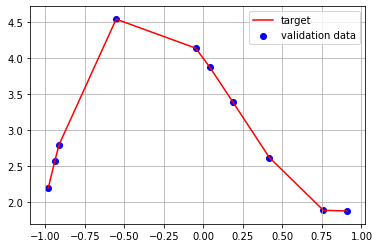

In [1]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np

# target parameters of f(x) = a*x^3 + b*x^2 + c*x + d
a=3
b=-2
c=-3
d=4

def f(x):
    return a*x**3 + b*x**2 + c*x + d

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = f(x_valid) # ideal (target) function

sigma = 0.0 # noise standard deviation
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target',color='red')
plt.scatter(x_valid, y_valid, color='blue', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

### Playing with: number of neurons and layers

Models:

1. 1 hidden layer with 1 neuron
2. 1 hidden layer with 50 neurons
3. 1 hidden layer with 100 neurons
4. 2 hidden layers with 100 and 50 neurons respectively
5. 3 hidden layers with 100, 100 and 100 neurons respectively
6. 5 hidden layers with 100, 100 and 100 neurons respectively

In [64]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

models=[]
units=[1,50,100]

#The following models have different number of neurons in the only hidden layer
for i in range(6):
    #The second and third have an increasing number of neurons, but one fixed hidden layer
    if i<3:
        model= tf.keras.Sequential()
        model.add(Dense(units[i], input_shape=(1,)))
        model.add(Activation("elu"))
        model.add(Dense(1, input_shape=(1,)))
        model.add(Activation("elu"))
    #The fourth and the fifth have more (hidden) layers
    if i==3:
        model= tf.keras.Sequential()
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation("elu"))
        model.add(Dense(50, input_shape=(1,)))
        model.add(Activation("elu"))
        model.add(Dense(1, input_shape=(1,)))
        model.add(Activation("elu"))
    if i==4:
        model= tf.keras.Sequential()
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation("elu"))
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation("elu"))
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation("elu"))
        model.add(Dense(1, input_shape=(1,)))
        model.add(Activation("elu"))
    if i==5:
        model= tf.keras.Sequential()
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation("elu"))
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation("elu"))
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation("elu"))
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation("elu"))
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation("elu"))
        model.add(Dense(1, input_shape=(1,)))
        model.add(Activation("elu"))
        
    models.append(model)

# compile the models choosing optimizer, loss and metrics objects
for model in models:
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
i=1
for model in models:
    print("Model ",i)
    model.summary()
    print()
    i+=1

Model  1
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1)                 2         
_________________________________________________________________
activation_41 (Activation)   (None, 1)                 0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 2         
_________________________________________________________________
activation_42 (Activation)   (None, 1)                 0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________

Model  2
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 50)                100       
_________________

In [65]:
# fit the models using training dataset
# report training progress against validation data
history=[]
for model in models:
    history.append(model.fit(x=x_train, y=y_train, 
              batch_size=64, epochs=200,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid)))
    print()

Epoch 1/200
16/16 [==============================] - 0s 15ms/step - loss: 9.1561 - mse: 9.1561 - val_loss: 4.3640 - val_mse: 4.3640
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 4.5861 - mse: 4.5861 - val_loss: 1.9557 - val_mse: 1.9557
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 2.4426 - mse: 2.4426 - val_loss: 1.0617 - val_mse: 1.0617
Epoch 4/200
16/16 [==============================] - 0s 8ms/step - loss: 1.5365 - mse: 1.5365 - val_loss: 0.8178 - val_mse: 0.8178
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 1.1813 - mse: 1.1813 - val_loss: 0.7860 - val_mse: 0.7860
Epoch 6/200
16/16 [==============================] - 0s 6ms/step - loss: 1.0320 - mse: 1.0320 - val_loss: 0.8094 - val_mse: 0.8094
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 0.9588 - mse: 0.9588 - val_loss: 0.8349 - val_mse: 0.8349
Epoch 8/200
16/16 [==============================] - 0s 6ms/step - loss: 0.9099 - 

Epoch 124/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3440 - mse: 0.3440 - val_loss: 0.9417 - val_mse: 0.9417
Epoch 125/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3438 - mse: 0.3438 - val_loss: 0.9380 - val_mse: 0.9380
Epoch 126/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3436 - mse: 0.3436 - val_loss: 0.9343 - val_mse: 0.9343
Epoch 127/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3434 - mse: 0.3434 - val_loss: 0.9367 - val_mse: 0.9367
Epoch 128/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3432 - mse: 0.3432 - val_loss: 0.9389 - val_mse: 0.9389
Epoch 129/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3431 - mse: 0.3431 - val_loss: 0.9376 - val_mse: 0.9376
Epoch 130/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3428 - mse: 0.3428 - val_loss: 0.9379 - val_mse: 0.9379
Epoch 131/200
16/16 [==============================] - 0s 5ms/step - 

16/16 [==============================] - 0s 5ms/step - loss: 0.4607 - mse: 0.4607 - val_loss: 1.1561 - val_mse: 1.1561
Epoch 48/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4584 - mse: 0.4584 - val_loss: 1.1680 - val_mse: 1.1680
Epoch 49/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4561 - mse: 0.4561 - val_loss: 1.1273 - val_mse: 1.1273
Epoch 50/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4533 - mse: 0.4533 - val_loss: 1.1429 - val_mse: 1.1429
Epoch 51/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4506 - mse: 0.4506 - val_loss: 1.1348 - val_mse: 1.1348
Epoch 52/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4487 - mse: 0.4487 - val_loss: 1.1700 - val_mse: 1.1700
Epoch 53/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4460 - mse: 0.4460 - val_loss: 1.1378 - val_mse: 1.1378
Epoch 54/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4431 - mse: 0

16/16 [==============================] - 0s 5ms/step - loss: 0.2430 - mse: 0.2430 - val_loss: 0.6338 - val_mse: 0.6338
Epoch 110/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2401 - mse: 0.2401 - val_loss: 0.6085 - val_mse: 0.6085
Epoch 111/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2366 - mse: 0.2366 - val_loss: 0.5941 - val_mse: 0.5941
Epoch 112/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2329 - mse: 0.2329 - val_loss: 0.5888 - val_mse: 0.5888
Epoch 113/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2304 - mse: 0.2304 - val_loss: 0.5709 - val_mse: 0.5709
Epoch 114/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2269 - mse: 0.2269 - val_loss: 0.5730 - val_mse: 0.5730
Epoch 115/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2240 - mse: 0.2240 - val_loss: 0.5790 - val_mse: 0.5790
Epoch 116/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2214 -

Epoch 171/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1342 - mse: 0.1342 - val_loss: 0.2787 - val_mse: 0.2787
Epoch 172/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1334 - mse: 0.1334 - val_loss: 0.2849 - val_mse: 0.2849
Epoch 173/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1329 - mse: 0.1329 - val_loss: 0.2882 - val_mse: 0.2882
Epoch 174/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1318 - mse: 0.1318 - val_loss: 0.2776 - val_mse: 0.2776
Epoch 175/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1314 - mse: 0.1314 - val_loss: 0.2660 - val_mse: 0.2660
Epoch 176/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1307 - mse: 0.1307 - val_loss: 0.2636 - val_mse: 0.2636
Epoch 177/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1297 - mse: 0.1297 - val_loss: 0.2598 - val_mse: 0.2598
Epoch 178/200
16/16 [==============================] - 0s 4ms/step - 

Epoch 33/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5281 - mse: 0.5281 - val_loss: 1.3227 - val_mse: 1.3227
Epoch 34/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5279 - mse: 0.5279 - val_loss: 1.3231 - val_mse: 1.3231
Epoch 35/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5270 - mse: 0.5270 - val_loss: 1.3401 - val_mse: 1.3401
Epoch 36/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5277 - mse: 0.5277 - val_loss: 1.2957 - val_mse: 1.2957
Epoch 37/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5253 - mse: 0.5253 - val_loss: 1.3172 - val_mse: 1.3172
Epoch 38/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5243 - mse: 0.5243 - val_loss: 1.2906 - val_mse: 1.2906
Epoch 39/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5233 - mse: 0.5233 - val_loss: 1.2769 - val_mse: 1.2769
Epoch 40/200
16/16 [==============================] - 0s 4ms/step - loss: 0.

16/16 [==============================] - 0s 4ms/step - loss: 0.4192 - mse: 0.4192 - val_loss: 1.0281 - val_mse: 1.0281
Epoch 96/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4168 - mse: 0.4168 - val_loss: 1.0537 - val_mse: 1.0537
Epoch 97/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4132 - mse: 0.4132 - val_loss: 1.0273 - val_mse: 1.0273
Epoch 98/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4096 - mse: 0.4096 - val_loss: 1.0483 - val_mse: 1.0483
Epoch 99/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4066 - mse: 0.4066 - val_loss: 1.0505 - val_mse: 1.0505
Epoch 100/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4027 - mse: 0.4027 - val_loss: 1.0646 - val_mse: 1.0646
Epoch 101/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3999 - mse: 0.3999 - val_loss: 1.0367 - val_mse: 1.0367
Epoch 102/200
16/16 [==============================] - 0s 4ms/step - loss: 0.3959 - mse

Epoch 157/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1972 - mse: 0.1972 - val_loss: 0.4995 - val_mse: 0.4995
Epoch 158/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1943 - mse: 0.1943 - val_loss: 0.4861 - val_mse: 0.4861
Epoch 159/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1921 - mse: 0.1921 - val_loss: 0.4766 - val_mse: 0.4766
Epoch 160/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1902 - mse: 0.1902 - val_loss: 0.4566 - val_mse: 0.4566
Epoch 161/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1876 - mse: 0.1876 - val_loss: 0.4596 - val_mse: 0.4596
Epoch 162/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1855 - mse: 0.1855 - val_loss: 0.4579 - val_mse: 0.4579
Epoch 163/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1842 - mse: 0.1842 - val_loss: 0.4482 - val_mse: 0.4482
Epoch 164/200
16/16 [==============================] - 0s 5ms/step - 

Epoch 19/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4617 - mse: 0.4617 - val_loss: 1.2704 - val_mse: 1.2704
Epoch 20/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4594 - mse: 0.4594 - val_loss: 1.1555 - val_mse: 1.1555
Epoch 21/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4529 - mse: 0.4529 - val_loss: 1.1032 - val_mse: 1.1032
Epoch 22/200
16/16 [==============================] - 0s 3ms/step - loss: 0.4479 - mse: 0.4479 - val_loss: 1.1187 - val_mse: 1.1187
Epoch 23/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4416 - mse: 0.4416 - val_loss: 1.1275 - val_mse: 1.1275
Epoch 24/200
16/16 [==============================] - 0s 5ms/step - loss: 0.4347 - mse: 0.4347 - val_loss: 1.0972 - val_mse: 1.0972
Epoch 25/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4276 - mse: 0.4276 - val_loss: 1.1085 - val_mse: 1.1085
Epoch 26/200
16/16 [==============================] - 0s 5ms/step - loss: 0.

16/16 [==============================] - 0s 4ms/step - loss: 0.0965 - mse: 0.0965 - val_loss: 0.2170 - val_mse: 0.2170
Epoch 82/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0948 - mse: 0.0948 - val_loss: 0.1837 - val_mse: 0.1837
Epoch 83/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0927 - mse: 0.0927 - val_loss: 0.1844 - val_mse: 0.1844
Epoch 84/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0907 - mse: 0.0907 - val_loss: 0.1567 - val_mse: 0.1567
Epoch 85/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0904 - mse: 0.0904 - val_loss: 0.1655 - val_mse: 0.1655
Epoch 86/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0887 - mse: 0.0887 - val_loss: 0.1699 - val_mse: 0.1699
Epoch 87/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0870 - mse: 0.0870 - val_loss: 0.1624 - val_mse: 0.1624
Epoch 88/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0855 - mse: 0

Epoch 143/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0460 - mse: 0.0460 - val_loss: 0.0660 - val_mse: 0.0660
Epoch 144/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0462 - mse: 0.0462 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 145/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0640 - val_mse: 0.0640
Epoch 146/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0452 - mse: 0.0452 - val_loss: 0.0622 - val_mse: 0.0622
Epoch 147/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0604 - val_mse: 0.0604
Epoch 148/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 149/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.0568 - val_mse: 0.0568
Epoch 150/200
16/16 [==============================] - 0s 5ms/step - 

16/16 [==============================] - 0s 7ms/step - loss: 0.0573 - mse: 0.0573 - val_loss: 0.1112 - val_mse: 0.1112
Epoch 67/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0554 - mse: 0.0554 - val_loss: 0.0991 - val_mse: 0.0991
Epoch 68/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0542 - mse: 0.0542 - val_loss: 0.0871 - val_mse: 0.0871
Epoch 69/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0521 - mse: 0.0521 - val_loss: 0.0863 - val_mse: 0.0863
Epoch 70/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0511 - mse: 0.0511 - val_loss: 0.0999 - val_mse: 0.0999
Epoch 71/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0503 - mse: 0.0503 - val_loss: 0.0909 - val_mse: 0.0909
Epoch 72/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0489 - mse: 0.0489 - val_loss: 0.0832 - val_mse: 0.0832
Epoch 73/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0481 - mse: 0

Epoch 128/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 129/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0192 - mse: 0.0192 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 130/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 131/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 132/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0198 - val_mse: 0.0198
Epoch 133/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 134/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 135/200
16/16 [==============================] - 0s 5ms/step - 

16/16 [==============================] - 0s 7ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 52/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0228 - mse: 0.0228 - val_loss: 0.0231 - val_mse: 0.0231
Epoch 53/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 54/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 55/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0403 - val_mse: 0.0403
Epoch 56/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0188 - mse: 0.0188 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 57/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 58/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0171 - mse: 0

16/16 [==============================] - 0s 7ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 114/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 115/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 116/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 117/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 118/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 119/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0164 - val_mse: 0.0164
Epoch 120/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0116 -

Epoch 175/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 176/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 177/200
16/16 [==============================] - 0s 7ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 178/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 179/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 180/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 181/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 182/200
16/16 [==============================] - 0s 4ms/step - 

In [66]:
i=1
for model in models:
    print("Model ",i)
    # evaluate model
    score = model.evaluate(x_train, y_train, batch_size=32, verbose=1)

    # print performance
    print('VALIDATION AGAINST Y_TRAIN')
    print('Loss:', score[0])
    #print('Test accuracy:', score[1])
    print()
    i+=1

Model  1
32/32 [==============================] - 0s 1ms/step - loss: 0.3305 - mse: 0.3305
VALIDATION AGAINST Y_TRAIN
Loss: 0.3304629325866699

Model  2
32/32 [==============================] - 0s 2ms/step - loss: 0.1147 - mse: 0.1147
VALIDATION AGAINST Y_TRAIN
Loss: 0.11468742787837982

Model  3
32/32 [==============================] - 0s 2ms/step - loss: 0.1349 - mse: 0.1349
VALIDATION AGAINST Y_TRAIN
Loss: 0.13489672541618347

Model  4
32/32 [==============================] - 0s 3ms/step - loss: 0.0314 - mse: 0.0314
VALIDATION AGAINST Y_TRAIN
Loss: 0.031380388885736465

Model  5
32/32 [==============================] - 0s 3ms/step - loss: 0.0152 - mse: 0.0152
VALIDATION AGAINST Y_TRAIN
Loss: 0.015234654769301414

Model  6
32/32 [==============================] - 0s 3ms/step - loss: 0.0081 - mse: 0.0081
VALIDATION AGAINST Y_TRAIN
Loss: 0.008061784319579601



In [67]:
i=1
for model in models:
    print("Model ",i)
    # evaluate model with the exact curve
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

    # print performance
    print('VALIDATION AGAINST Y_VALID')
    print('Loss:', score[0])
    #print('Test accuracy:', score[1])
    print()
    i+=1

Model  1
1/1 [==============================] - 0s 11ms/step - loss: 0.9121 - mse: 0.9121
VALIDATION AGAINST Y_VALID
Loss: 0.912097156047821

Model  2
1/1 [==============================] - 0s 4ms/step - loss: 0.2237 - mse: 0.2237
VALIDATION AGAINST Y_VALID
Loss: 0.22367742657661438

Model  3
1/1 [==============================] - 0s 8ms/step - loss: 0.2767 - mse: 0.2767
VALIDATION AGAINST Y_VALID
Loss: 0.2767208218574524

Model  4
1/1 [==============================] - 0s 8ms/step - loss: 0.0299 - mse: 0.0299
VALIDATION AGAINST Y_VALID
Loss: 0.029942935332655907

Model  5
1/1 [==============================] - 0s 4ms/step - loss: 0.0213 - mse: 0.0213
VALIDATION AGAINST Y_VALID
Loss: 0.021281462162733078

Model  6
1/1 [==============================] - 0s 11ms/step - loss: 0.0090 - mse: 0.0090
VALIDATION AGAINST Y_VALID
Loss: 0.008953492157161236



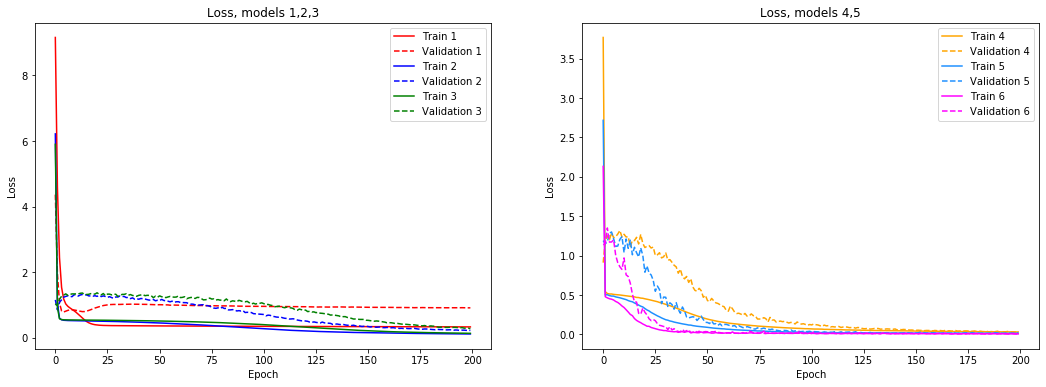

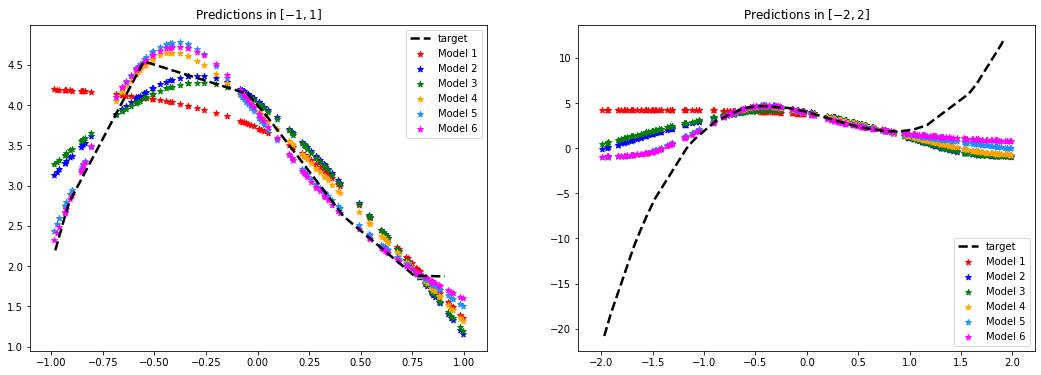

In [68]:
# look into training history
# Plot training & validation loss values

fig, (fig_1, fig_2) = plt.subplots(1, 2, figsize=(18,6))
kol = ['cyan','red','blue','green','orange','dodgerblue','magenta']

i=1

for h in history:
    if i<=3:
        fig_1.plot(h.history['loss'],label="Train "+str(i),color=kol[i])
        fig_1.plot(h.history['val_loss'],label="Validation "+str(i),color=kol[i],linestyle='dashed',linewidth='1.5')
    else:
        fig_2.plot(h.history['loss'],label="Train "+str(i),color=kol[i])
        fig_2.plot(h.history['val_loss'],label="Validation "+str(i),color=kol[i],linestyle='dashed',linewidth='1.5')
    i+=1

fig_1.legend(loc='best')
fig_1.set_title("Loss, models 1,2,3")
fig_1.set_ylabel('Loss')
#fig_1.set_xscale('log')
#fig_1.set_yscale('log')
fig_1.set_xlabel('Epoch')

fig_2.legend(loc='best')
fig_2.set_title("Loss, models 4,5,6")
fig_2.set_ylabel('Loss')
fig_2.set_xlabel('Epoch')

plt.show()

x_predicted_1 = np.random.uniform(-1, 1, 100)
x_predicted_2 = np.random.uniform(-2, 2, 200)

x_valid_2=np.random.uniform(-2,2,40)
x_valid_2.sort()
y_target_2=f(x_valid_2)

fig, (fig_1, fig_2) = plt.subplots(1, 2, figsize=(18,6))

i=1
for model in models:
    y_predicted_1 = model.predict(x_predicted_1)
    y_predicted_2 = model.predict(x_predicted_2)
    fig_1.scatter(x_predicted_1, y_predicted_1,label="Model "+str(i),marker='*',color=kol[i])
    fig_2.scatter(x_predicted_2, y_predicted_2,label="Model "+str(i),marker='*',color=kol[i])
    i+=1

fig_1.plot(x_valid, y_target,label="target",color='black',linewidth='2.5',linestyle='dashed')
fig_1.set_title("Predictions in $[-1,1]$")
fig_1.legend()


fig_2.plot(x_valid_2, y_target_2,label="target",color='black',linewidth='2.5',linestyle='dashed')
fig_2.set_title("Predictions in $[-2,2]$")
fig_2.legend()

plt.show()


#### *Comments*

In the fitting interval $[-1,1]$, more complex NNs lead (unsurprisingly) to better predictions. In particular, model 1 is not reliable, since the loss function for the validation set saturates to a large value, way higher than its training counterpart. The validation loss - training loss gap is progressively reduced with increasing epochs for the other models.

Note that in the two graphs below there is similarity between models 2 and 3 (50 vs 100) as well as among models 4, 5 and 6 (50-100 vs 3x100 vs 5x100). Apparent message to take home: raising complexity above certain thresholds does not necessarily lead to strikingly different results (even though behaviour of loss is constantly improving).

Finally, all models turn out to be highly inadequate outside the fitting region.

### Playing with: activation functions, loss functions and optimizers

All models below feature the same number of hidden layers (3) and neurons/layer (100).

1. {activation_function='elu', optimizer='sgd', loss='mse'}
2. {activation_function='sigmoid', optimizer='sgd', loss='mse'}
3. {activation_function='softmax', optimizer='sgd', loss='mse'}
4. {activation_function='elu', optimizer='adam', loss='mse'}
6. {activation_function='elu', optimizer='sgd', loss='mae'}
7. {activation_function='elu', optimizer='sgd', loss='msle'}

In [75]:
models=[]

act_func=["elu","sigmoid","softmax"]
opt=["sgd","adam"]
loss=["mse","mae","msle"]  #categorichal cross entropy

for i in range(6):
    if i<3:
        model= tf.keras.Sequential()
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation(act_func[i]))
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation(act_func[i]))
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation(act_func[i]))
        model.add(Dense(1, input_shape=(1,)))
        model.add(Activation(act_func[i]))
    else:
        model= tf.keras.Sequential()
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation(act_func[0]))
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation(act_func[0]))
        model.add(Dense(100, input_shape=(1,)))
        model.add(Activation(act_func[0]))
        model.add(Dense(1, input_shape=(1,)))
        model.add(Activation(act_func[0]))
        
    models.append(model)

# compile the models choosing optimizer, loss and metrics objects
i=0
for model in models:
    if i<3:
        model.compile(optimizer=opt[0], loss=loss[0], metrics=['mse'])
    if i==3:
        model.compile(optimizer=opt[1], loss=loss[0], metrics=['mse'])
    else:
        model.compile(optimizer=opt[0], loss=loss[i-3], metrics=['mse'])

In [76]:
# fit the models using training dataset
# report training progress against validation data
history=[]
for model in models:
    history.append(model.fit(x=x_train, y=y_train, 
              batch_size=64, epochs=200,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid)))

Epoch 1/200
16/16 [==============================] - 0s 13ms/step - loss: 3.1810 - mse: 3.1810 - val_loss: 1.0141 - val_mse: 1.0141
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5105 - mse: 0.5105 - val_loss: 1.2513 - val_mse: 1.2513
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 0.4965 - mse: 0.4965 - val_loss: 1.1471 - val_mse: 1.1471
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 0.4898 - mse: 0.4898 - val_loss: 1.2861 - val_mse: 1.2861
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 0.4858 - mse: 0.4858 - val_loss: 1.2472 - val_mse: 1.2472
Epoch 6/200
16/16 [==============================] - 0s 8ms/step - loss: 0.4755 - mse: 0.4755 - val_loss: 1.3304 - val_mse: 1.3304
Epoch 7/200
16/16 [==============================] - 0s 8ms/step - loss: 0.4728 - mse: 0.4728 - val_loss: 1.1466 - val_mse: 1.1466
Epoch 8/200
16/16 [==============================] - 0s 8ms/step - loss: 0.4636 - 

Epoch 125/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 126/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0165 - val_mse: 0.0165
Epoch 127/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0170 - val_mse: 0.0170
Epoch 128/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 129/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0175 - val_mse: 0.0175
Epoch 130/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 131/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 132/200
16/16 [==============================] - 0s 5ms/step - 

16/16 [==============================] - 0s 7ms/step - loss: 6.6459 - mse: 6.6459 - val_loss: 4.7736 - val_mse: 4.7736
Epoch 49/200
16/16 [==============================] - 0s 6ms/step - loss: 6.6458 - mse: 6.6458 - val_loss: 4.7736 - val_mse: 4.7736
Epoch 50/200
16/16 [==============================] - 0s 7ms/step - loss: 6.6458 - mse: 6.6458 - val_loss: 4.7735 - val_mse: 4.7735
Epoch 51/200
16/16 [==============================] - 0s 7ms/step - loss: 6.6457 - mse: 6.6457 - val_loss: 4.7734 - val_mse: 4.7734
Epoch 52/200
16/16 [==============================] - 0s 7ms/step - loss: 6.6456 - mse: 6.6456 - val_loss: 4.7734 - val_mse: 4.7734
Epoch 53/200
16/16 [==============================] - 0s 7ms/step - loss: 6.6455 - mse: 6.6455 - val_loss: 4.7733 - val_mse: 4.7733
Epoch 54/200
16/16 [==============================] - 0s 7ms/step - loss: 6.6455 - mse: 6.6455 - val_loss: 4.7733 - val_mse: 4.7733
Epoch 55/200
16/16 [==============================] - 0s 7ms/step - loss: 6.6454 - mse: 6

16/16 [==============================] - 0s 8ms/step - loss: 6.6437 - mse: 6.6437 - val_loss: 4.7718 - val_mse: 4.7718
Epoch 111/200
16/16 [==============================] - 0s 6ms/step - loss: 6.6437 - mse: 6.6437 - val_loss: 4.7718 - val_mse: 4.7718
Epoch 112/200
16/16 [==============================] - 0s 5ms/step - loss: 6.6437 - mse: 6.6437 - val_loss: 4.7718 - val_mse: 4.7718
Epoch 113/200
16/16 [==============================] - 0s 5ms/step - loss: 6.6437 - mse: 6.6437 - val_loss: 4.7718 - val_mse: 4.7718
Epoch 114/200
16/16 [==============================] - 0s 5ms/step - loss: 6.6437 - mse: 6.6437 - val_loss: 4.7718 - val_mse: 4.7718
Epoch 115/200
16/16 [==============================] - 0s 6ms/step - loss: 6.6437 - mse: 6.6437 - val_loss: 4.7718 - val_mse: 4.7718
Epoch 116/200
16/16 [==============================] - 0s 5ms/step - loss: 6.6436 - mse: 6.6436 - val_loss: 4.7717 - val_mse: 4.7717
Epoch 117/200
16/16 [==============================] - 0s 5ms/step - loss: 6.6436 -

Epoch 172/200
16/16 [==============================] - 0s 6ms/step - loss: 6.6431 - mse: 6.6431 - val_loss: 4.7713 - val_mse: 4.7713
Epoch 173/200
16/16 [==============================] - 0s 5ms/step - loss: 6.6431 - mse: 6.6431 - val_loss: 4.7713 - val_mse: 4.7713
Epoch 174/200
16/16 [==============================] - 0s 5ms/step - loss: 6.6431 - mse: 6.6431 - val_loss: 4.7713 - val_mse: 4.7713
Epoch 175/200
16/16 [==============================] - 0s 4ms/step - loss: 6.6431 - mse: 6.6431 - val_loss: 4.7713 - val_mse: 4.7713
Epoch 176/200
16/16 [==============================] - 0s 5ms/step - loss: 6.6431 - mse: 6.6431 - val_loss: 4.7713 - val_mse: 4.7713
Epoch 177/200
16/16 [==============================] - 0s 6ms/step - loss: 6.6431 - mse: 6.6431 - val_loss: 4.7713 - val_mse: 4.7713
Epoch 178/200
16/16 [==============================] - 0s 5ms/step - loss: 6.6431 - mse: 6.6431 - val_loss: 4.7713 - val_mse: 4.7713
Epoch 179/200
16/16 [==============================] - 0s 5ms/step - 

Epoch 34/200
16/16 [==============================] - 0s 5ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 35/200
16/16 [==============================] - 0s 4ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 36/200
16/16 [==============================] - 0s 6ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 37/200
16/16 [==============================] - 0s 6ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 38/200
16/16 [==============================] - 0s 5ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 39/200
16/16 [==============================] - 0s 5ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 40/200
16/16 [==============================] - 0s 6ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 41/200
16/16 [==============================] - 0s 8ms/step - loss: 6.

16/16 [==============================] - 0s 7ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 97/200
16/16 [==============================] - 0s 9ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 98/200
16/16 [==============================] - 0s 7ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 99/200
16/16 [==============================] - 0s 8ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 100/200
16/16 [==============================] - 0s 8ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 101/200
16/16 [==============================] - 0s 6ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 102/200
16/16 [==============================] - 0s 6ms/step - loss: 6.6421 - mse: 6.6421 - val_loss: 4.7705 - val_mse: 4.7705
Epoch 103/200
16/16 [==============================] - 0s 7ms/step - loss: 6.6421 - ms

Epoch 19/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3453 - mse: 0.3453 - val_loss: 0.9075 - val_mse: 0.9075
Epoch 20/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3241 - mse: 0.3241 - val_loss: 0.7797 - val_mse: 0.7797
Epoch 21/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3104 - mse: 0.3104 - val_loss: 0.7525 - val_mse: 0.7525
Epoch 22/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2963 - mse: 0.2963 - val_loss: 0.9231 - val_mse: 0.9231
Epoch 23/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2825 - mse: 0.2825 - val_loss: 0.6420 - val_mse: 0.6420
Epoch 24/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2673 - mse: 0.2673 - val_loss: 0.6351 - val_mse: 0.6351
Epoch 25/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2518 - mse: 0.2518 - val_loss: 0.6426 - val_mse: 0.6426
Epoch 26/200
16/16 [==============================] - 0s 5ms/step - loss: 0.

Epoch 143/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 144/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 145/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 146/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 147/200
16/16 [==============================] - 0s 8ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0177 - val_mse: 0.0177
Epoch 148/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 149/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 150/200
16/16 [==============================] - 0s 6ms/step - 

16/16 [==============================] - 0s 5ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.1130 - val_mse: 0.1130
Epoch 67/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0555 - mse: 0.0555 - val_loss: 0.1058 - val_mse: 0.1058
Epoch 68/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0554 - mse: 0.0554 - val_loss: 0.1231 - val_mse: 0.1231
Epoch 69/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0530 - mse: 0.0530 - val_loss: 0.1041 - val_mse: 0.1041
Epoch 70/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0992 - val_mse: 0.0992
Epoch 71/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0510 - mse: 0.0510 - val_loss: 0.0876 - val_mse: 0.0876
Epoch 72/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0508 - mse: 0.0508 - val_loss: 0.0863 - val_mse: 0.0863
Epoch 73/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0500 - mse: 0

Epoch 128/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 129/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 130/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0467 - mse: 0.0467 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 131/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 132/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0288 - val_mse: 0.0288
Epoch 133/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 134/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 135/200
16/16 [==============================] - 0s 7ms/step - 

16/16 [==============================] - 0s 5ms/step - loss: 0.0636 - mse: 0.0636 - val_loss: 0.1217 - val_mse: 0.1217
Epoch 52/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0622 - mse: 0.0622 - val_loss: 0.1098 - val_mse: 0.1098
Epoch 53/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0607 - mse: 0.0607 - val_loss: 0.1105 - val_mse: 0.1105
Epoch 54/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0575 - mse: 0.0575 - val_loss: 0.1144 - val_mse: 0.1144
Epoch 55/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0559 - mse: 0.0559 - val_loss: 0.1339 - val_mse: 0.1339
Epoch 56/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0557 - mse: 0.0557 - val_loss: 0.1037 - val_mse: 0.1037
Epoch 57/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0536 - mse: 0.0536 - val_loss: 0.0972 - val_mse: 0.0972
Epoch 58/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0513 - mse: 0

16/16 [==============================] - 0s 7ms/step - loss: 0.0227 - mse: 0.0227 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 114/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 115/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 116/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 117/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 118/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0209 - mse: 0.0209 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 119/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 120/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0205 -

Epoch 175/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 176/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 177/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 178/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0197 - val_mse: 0.0197
Epoch 179/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 180/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 181/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 182/200
16/16 [==============================] - 0s 5ms/step - 

In [77]:
i=1
for model in models:
    print("Model ",i)
    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

    # print performance
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print()
    i+=1

Model  1
1/1 [==============================] - 0s 5ms/step - loss: 0.0138 - mse: 0.0138
Test loss: 0.013821360655128956
Test accuracy: 0.013821360655128956

Model  2
1/1 [==============================] - 0s 3ms/step - loss: 4.7712 - mse: 4.7712
Test loss: 4.771200180053711
Test accuracy: 4.771200180053711

Model  3
1/1 [==============================] - 0s 9ms/step - loss: 4.7705 - mse: 4.7705
Test loss: 4.770474433898926
Test accuracy: 4.770474433898926

Model  4
1/1 [==============================] - 0s 8ms/step - loss: 0.0221 - mse: 0.0221
Test loss: 0.0220587607473135
Test accuracy: 0.0220587607473135

Model  5
1/1 [==============================] - 0s 7ms/step - loss: 0.0249 - mse: 0.0249
Test loss: 0.02493019960820675
Test accuracy: 0.02493019960820675

Model  6
1/1 [==============================] - 0s 6ms/step - loss: 0.0361 - mse: 0.0361
Test loss: 0.036072082817554474
Test accuracy: 0.036072082817554474



In [78]:
i=1
for model in models:
    print("Model ",i)
    # evaluate model with the exact curve
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

    # print performance
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print()
    i+=1

Model  1
1/1 [==============================] - 0s 5ms/step - loss: 0.0138 - mse: 0.0138
Test loss: 0.013821360655128956
Test accuracy: 0.013821360655128956

Model  2
1/1 [==============================] - 0s 3ms/step - loss: 4.7712 - mse: 4.7712
Test loss: 4.771200180053711
Test accuracy: 4.771200180053711

Model  3
1/1 [==============================] - 0s 5ms/step - loss: 4.7705 - mse: 4.7705
Test loss: 4.770474433898926
Test accuracy: 4.770474433898926

Model  4
1/1 [==============================] - 0s 3ms/step - loss: 0.0221 - mse: 0.0221
Test loss: 0.0220587607473135
Test accuracy: 0.0220587607473135

Model  5
1/1 [==============================] - 0s 8ms/step - loss: 0.0249 - mse: 0.0249
Test loss: 0.02493019960820675
Test accuracy: 0.02493019960820675

Model  6
1/1 [==============================] - 0s 9ms/step - loss: 0.0361 - mse: 0.0361
Test loss: 0.036072082817554474
Test accuracy: 0.036072082817554474



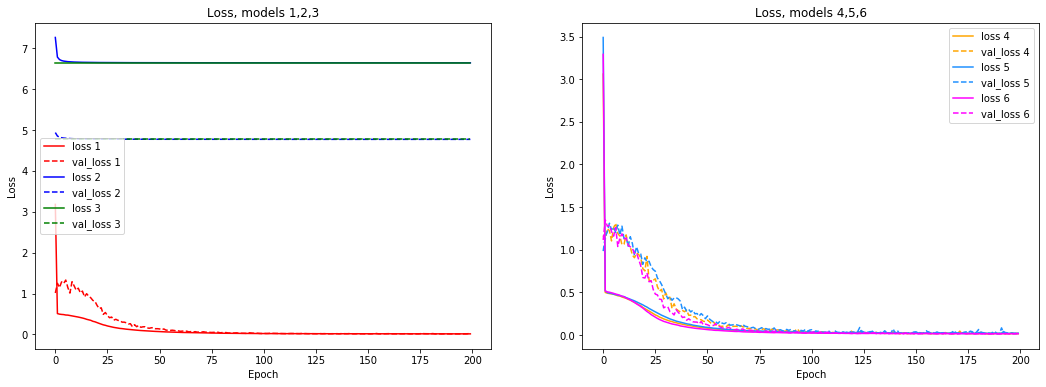

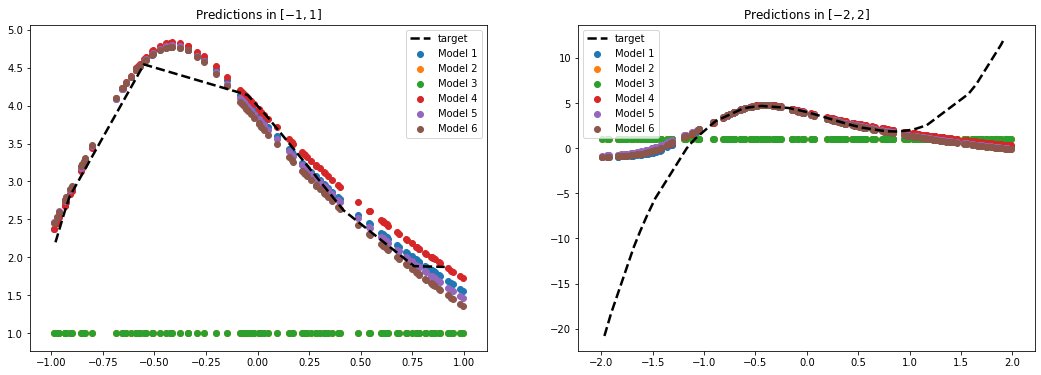

In [81]:
# look into training history
# Plot training & validation loss values

fig, (fig_1, fig_2) = plt.subplots(1, 2, figsize=(18,6))

i=1

for h in history:
    if i<=3:
        fig_1.plot(h.history['loss'],label="loss "+str(i),color=kol[i])
        fig_1.plot(h.history['val_loss'],label="val_loss "+str(i),color=kol[i],linestyle='dashed')
    else:
        fig_2.plot(h.history['loss'],label="loss "+str(i),color=kol[i])
        fig_2.plot(h.history['val_loss'],label="val_loss "+str(i),color=kol[i],linestyle='dashed')
    i+=1

fig_1.legend(loc='best')
fig_1.set_title("Loss, models 1,2,3")
fig_1.set_ylabel('Loss')
fig_1.set_xlabel('Epoch')

fig_2.legend(loc='best')
fig_2.set_title("Loss, models 4,5,6")
fig_2.set_ylabel('Loss')
fig_2.set_xlabel('Epoch')

plt.show()

fig, (fig_1, fig_2) = plt.subplots(1, 2, figsize=(18,6))

i=1

for model in models:
    y_predicted_1 = model.predict(x_predicted_1)
    y_predicted_2 = model.predict(x_predicted_2)
    fig_1.scatter(x_predicted_1, y_predicted_1,label="Model "+str(i))
    fig_2.scatter(x_predicted_2, y_predicted_2,label="Model "+str(i))
    i+=1

fig_1.plot(x_valid, y_target,label="target",color='black',linewidth='2.5',linestyle='dashed')
fig_1.set_title("Predictions in $[-1,1]$")
fig_1.legend()


fig_2.plot(x_valid_2, y_target_2,label="target",color='black',linewidth='2.5',linestyle='dashed')
fig_2.set_title("Predictions in $[-2,2]$")
fig_2.legend()

plt.show()

### *Comments*

It looks like what models are most sensitive to is the activation function. The two models with AF different from *elu* perform quite terribly, whereas all the others in the batch give similar outcomes, regardlessly of the different optimizers and loss functions.
As noted before, outside of $[-1,1]$ predictions are very poor.